# 5. Caso de estudio: *The Midnight Barber*

![alt text](docs/img/MidnightBarber.png "Title")

En este capítulo vamos a explorar los datos con un enfoque específico. Vamos a averiguar "cómo encajaría" un juego con unas características concretas dentro de la plataforma Steam. El nombre del juego es ***The Midnight Barber*** (Omaet Games) y esta es su trama:
> Ambientado en una Barcelona de los 70 poblada por criaturas de la mitología catalana, Midnight Barber es una barbería que sólo abre a medianoche. A ella acudirán distintos clientes, y será el objetivo del jugador descubrir sus circunstancias e incluso si hay alguna relación entre ellos. Para conseguir que se *abran*, al inicio de la sesión se reproducirá un vinilo cuya música es acorde a su personalidad, y deberá cortarles el pelo al ritmo del beat.<br>

Por lo tanto, estas serían más o menos las etiquetas con las que se promocionará:
- Género principal: Simulation
- Género secundario: Rhythm
- Subgénero: N/A
- Visuals: 2D
- Players: Singleplayer

Además, el objetivo de los desarrolladores es que sea **editado por Annapurna Interactive**.

### Carga de librerías, datos y otros

In [9]:
# Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from utils.constantes import *


# Datos y procesado
df = pd.read_csv('data/processed/MainDF_full.csv', parse_dates=['Release date'])
df.drop(df[(df['Price'] > 100)].index, axis=0, inplace=True)
df.reset_index(inplace=True)
df.replace({'Owners' : {'0\xa0..\xa020,000' : 10000,
                        '20,000\xa0..\xa050,000' : 35000,
                        '50,000\xa0..\xa0100,000' : 75000,
                        '100,000\xa0..\xa0200,000' : 150000,
                        '200,000\xa0..\xa0500,000' : 350000,
                        '500,000\xa0..\xa01,000,000' : 750000,
                        '1,000,000\xa0..\xa02,000,000' : 1500000,
                        '2,000,000\xa0..\xa05,000,000' : 3500000,
                        '5,000,000\xa0..\xa010,000,000' : 7500000,
                        '10,000,000\xa0..\xa020,000,000' : 15000000,
                        '20,000,000\xa0..\xa050,000,000' : 35000000,
                        '50,000,000\xa0..\xa0100,000,000' : 75000000,
                        '100,000,000\xa0..\xa0200,000,000' : 150000000,
                        '200,000,000\xa0..\xa0500,000,000' : 350000000}}, inplace=True)
df['Owners'] = df['Owners'].astype('int')


# Filtros
top10_genres = df['Genres'].value_counts().head(10).index
top10_subgenres = df['Subgenres'].value_counts().head(10).index
top10_visuals = df['Visuals'].value_counts().head(10).index
top10_publishers = df['Publisher(s)'].value_counts().head(10).index

## 5.1 Género principal: Simulation

En primer lugar, comprobamos la popularidad de esta etiqueta, tanto en **publicación** como en **ventas**

C:\Users\rodri\AppData\Local\Temp\ipykernel_13356\2149344551.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Top level genre',
C:\Users\rodri\AppData\Local\Temp\ipykernel_13356\2149344551.py:3: UserWarning: 
The palette list has fewer values (5) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='Top level genre',
C:\Users\rodri\AppData\Local\Temp\ipykernel_13356\2149344551.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Top level genre',
C:\Users\rodri\AppData\Local\Temp\ipykernel_13356\2149344551.py:10: UserWarning: 
The palette list has fewer values (5) than needed (11) and will cycle, which may produce an uninterpretable plo

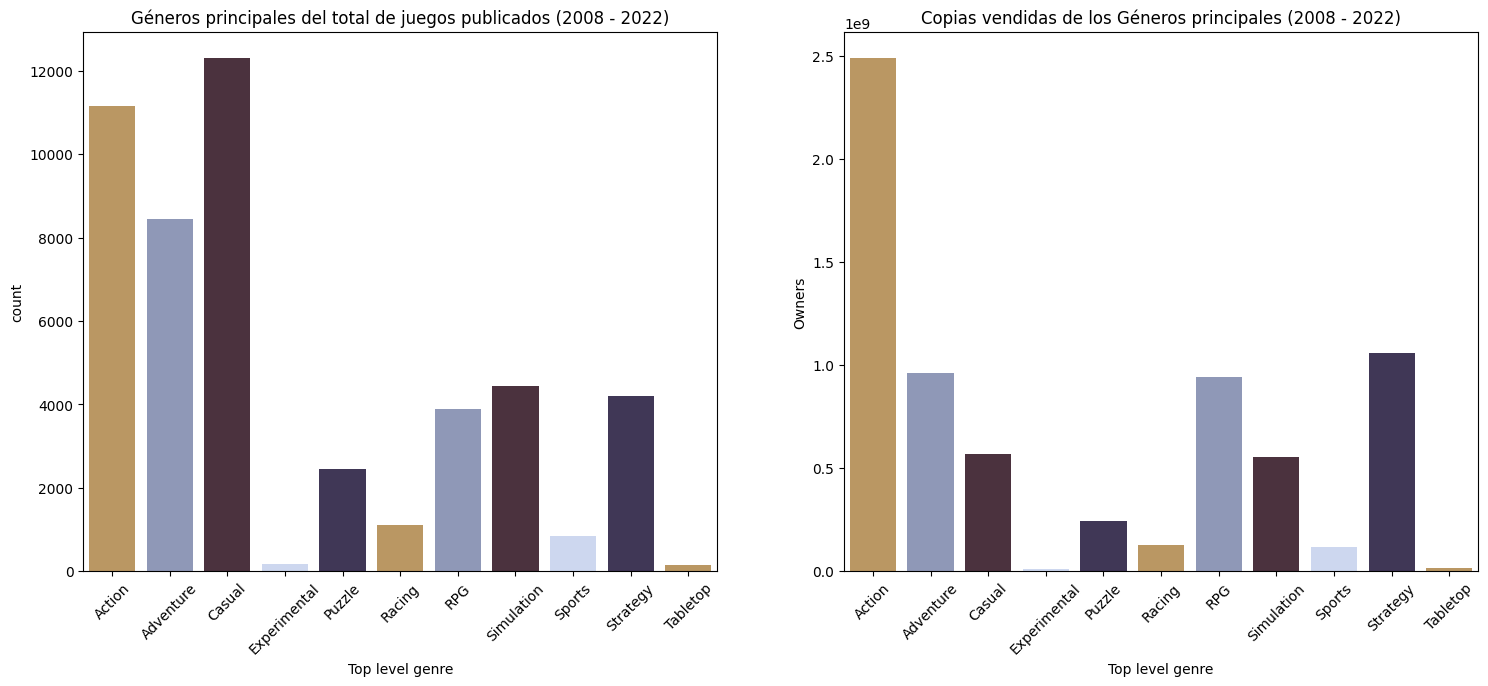

In [10]:
plt.figure(figsize=(18,7))
plt.subplot(1,2,1)
sns.countplot(x='Top level genre',
              data=df,
              palette=midnight_palette,
              order=top_level_genres).set(title="Géneros principales del total de juegos publicados (2008 - 2022)")
plt.xticks(rotation=45);

plt.subplot(1,2,2)
sns.barplot(x = 'Top level genre',
            y = 'Owners',
            data=pd.DataFrame(df.groupby('Top level genre')['Owners'].sum()),
            palette=midnight_palette,
            order=top_level_genres).set(title="Copias vendidas de los Géneros principales (2008 - 2022)")
plt.xticks(rotation=45);

Con la primera gráfica, observamos que no es una de las categorías que más se publica, así que no tendrá tanta competencia en oferta como si fuera un juego de Acción, Aventura o Casual.<br>
Con la segunda gráfica, observamos que a duras penas se encuentra en las categorías de juegos más vendidos, siendo superado por Adventure, RPG, Strategy y, con muchísima más ventaja, Action.

## 5.2 Género secundario: Rhythm

En primer lugar, comprobamos si pertence a las 10 etiquetas más publicadas

In [11]:
'Rhythm' in top10_genres

False

Averiguamos en qué **posición** está Rhythm con respecto a la **oferta**:

In [12]:
for index, i in enumerate(df['Genres'].value_counts().index):
    if i == 'Rhythm':
        print(i, 'está en la posición', index, 'de los Géneros secundarios más publicados')

Rhythm está en la posición 25 de los Géneros secundarios más publicados


Averiguamos en qué **posición** está Rhythm con respecto a las **ventas**:

In [13]:
for index, i in enumerate(df.groupby('Genres')['Owners'].sum().sort_values(ascending=False).index):
    if i == 'Rhythm':
        print(i, 'está en la posición', index, 'de los Géneros secundarios más vendidos')

Rhythm está en la posición 25 de los Géneros secundarios más vendidos


De entrada, estos datos nos indican que el Género secundario Rhythm es bastante poco popular, tanto en oferta como en demanda.

Ahora veamos algo más específico: ¿cuál es la distribución de los géneros secundarios de los juegos tipo Simulation, y qué éxito tienen los de tipo *Rhythm*?

C:\Users\rodri\AppData\Local\Temp\ipykernel_13356\421080644.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Genres',
C:\Users\rodri\AppData\Local\Temp\ipykernel_13356\421080644.py:2: UserWarning: 
The palette list has fewer values (5) than needed (67) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='Genres',


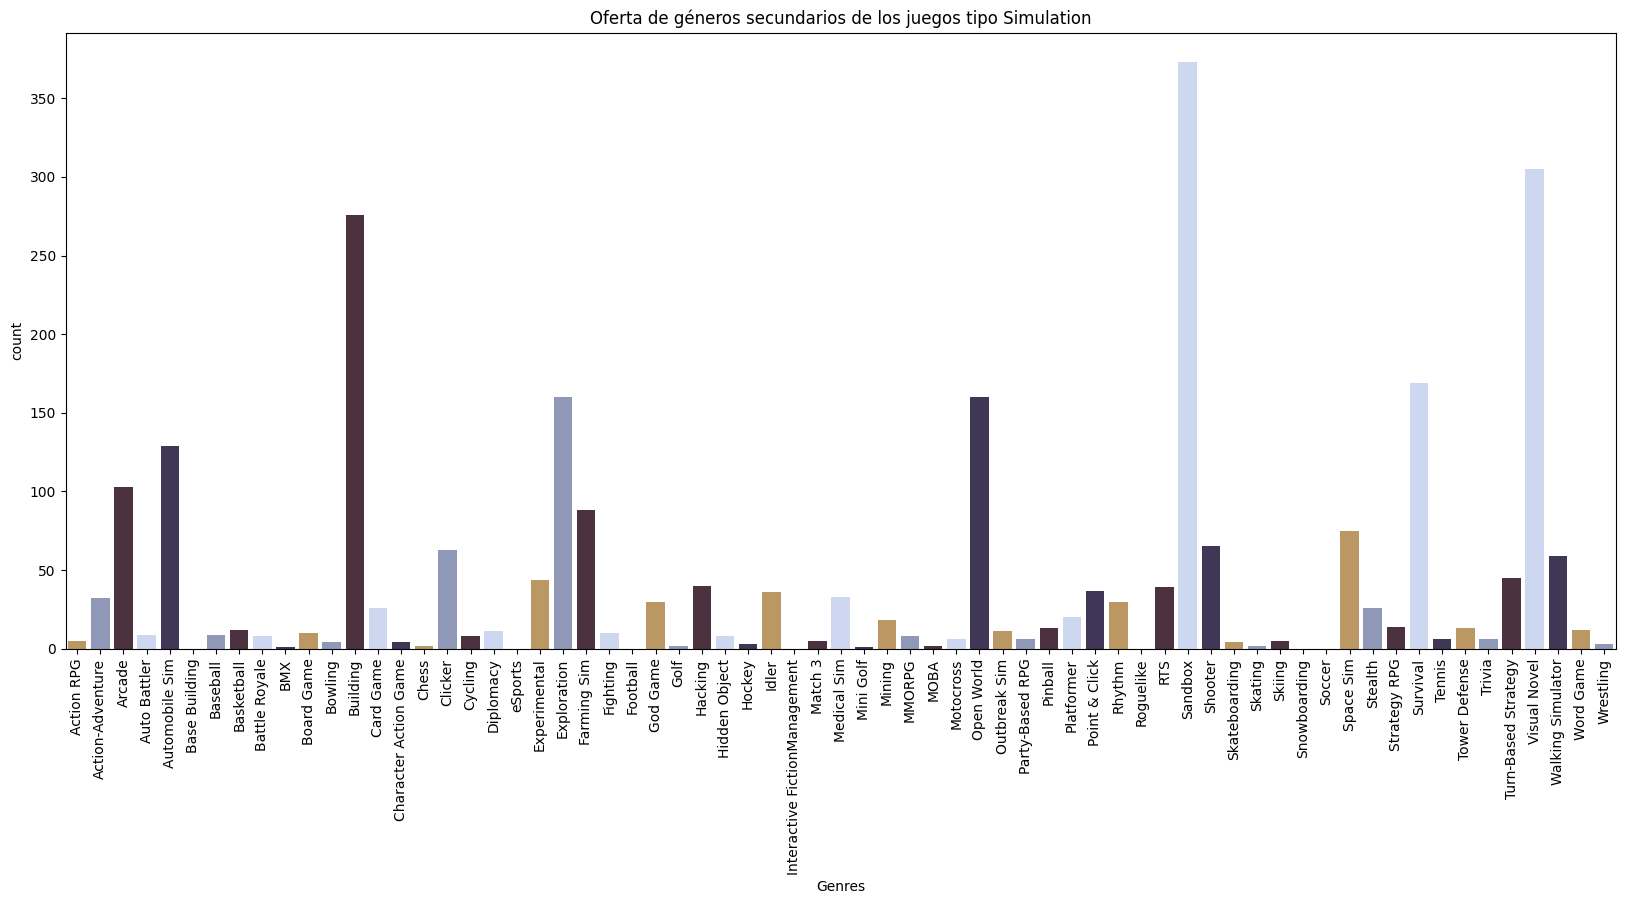

In [14]:
plt.figure(figsize=(20,8))
sns.countplot(x='Genres',
              data=df[(df['Top level genre'] == 'Simulation')],
              order=genres,
              palette=midnight_palette).set(title="Oferta de géneros secundarios de los juegos tipo Simulation")
plt.xticks(rotation=90);

C:\Users\rodri\AppData\Local\Temp\ipykernel_13356\3547922915.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Genres',
C:\Users\rodri\AppData\Local\Temp\ipykernel_13356\3547922915.py:2: UserWarning: 
The palette list has fewer values (5) than needed (67) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = 'Genres',


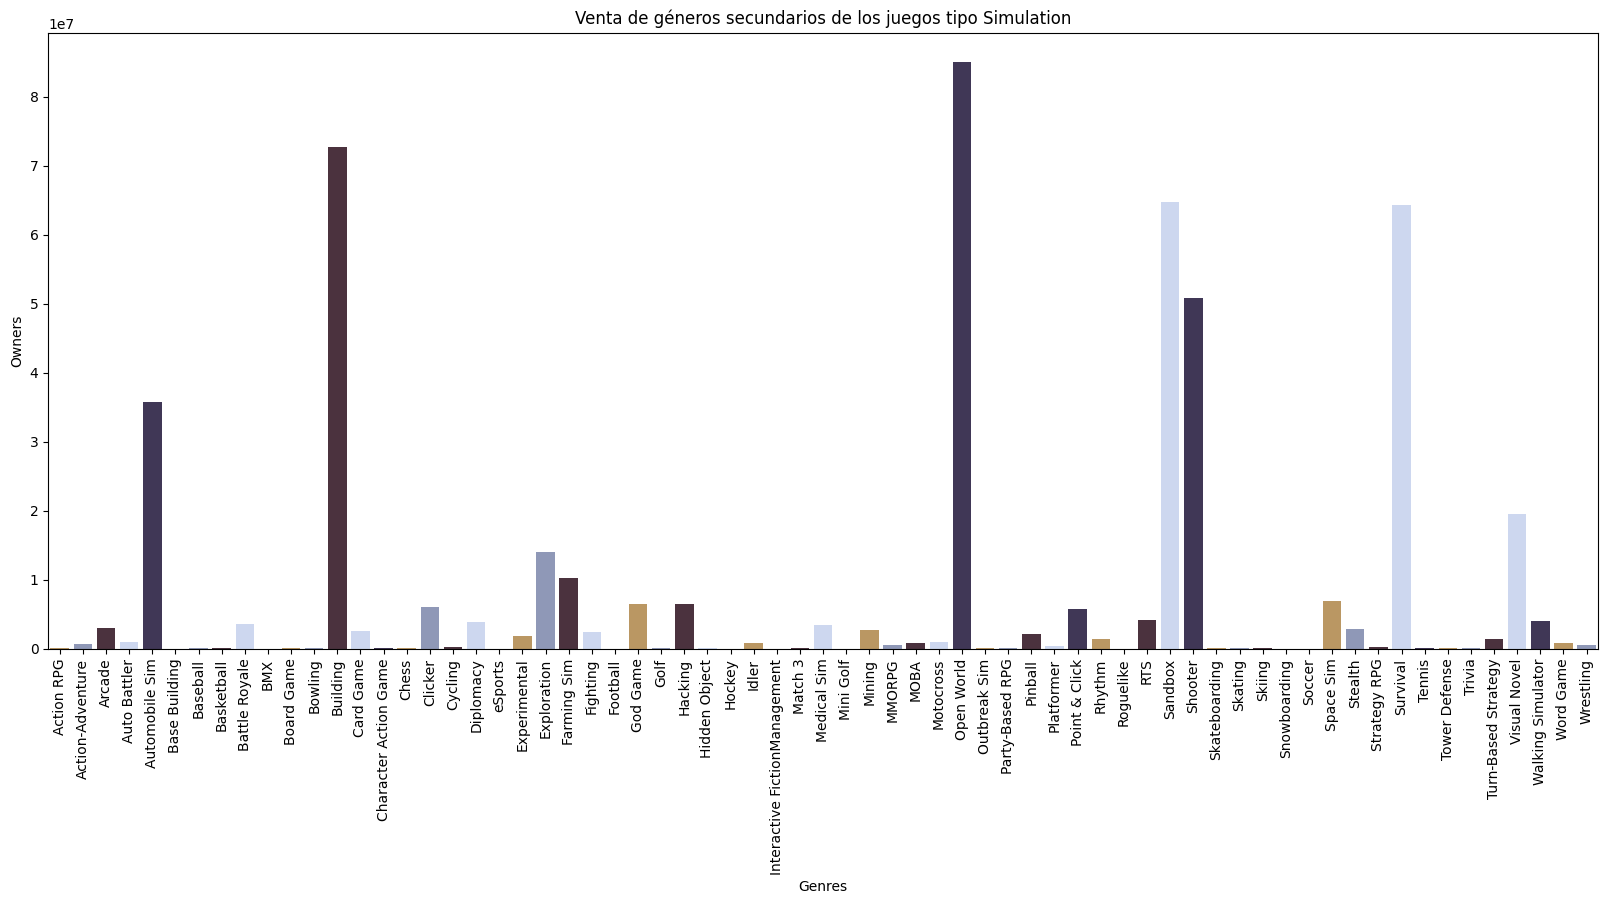

In [15]:
plt.figure(figsize=(20,8))
sns.barplot(x = 'Genres',
            y = 'Owners',
            data=pd.DataFrame(df[(df['Top level genre'] == 'Simulation')].groupby('Genres')['Owners'].sum()),
            order=genres,
            palette=midnight_palette).set(title="Venta de géneros secundarios de los juegos tipo Simulation")
plt.xticks(rotation=90);

La gráfica representa muchas categorías, y por tanto se hace difícil ver información específica de cada una. Sin embargo, sí nos permite ver que tanto en oferta como en ventas hay 6 categorías que se destacan del resto con un gran margen, y *Rhythm* no es una de ellas.<br><br>
Ahora acudimos directamente a código para saber en qué posición se encuentra *Rhythm* con respecto a todas estas categorías.

In [16]:
for index, i in enumerate(df[df['Top level genre']=='Simulation']['Genres'].value_counts().index):
    if i == 'Rhythm':
        print(f'{i} está en la posición {index} de los juegos tipo Simulation más publicados')

for index, i in enumerate(df[df['Top level genre']=='Simulation'].groupby('Genres')['Owners'].sum().sort_values(ascending=False).index):
    if i == 'Rhythm':
        print(f'{i} está en la posición {index} de los juegos tipo Simulation más vendidos')

Rhythm está en la posición 22 de los juegos tipo Simulation más publicados
Rhythm está en la posición 26 de los juegos tipo Simulation más vendidos


## 5.3 Juegos tipo Simulation *y* Rhythm

Hay 30 juegos de tipo Simulation-Rhythm


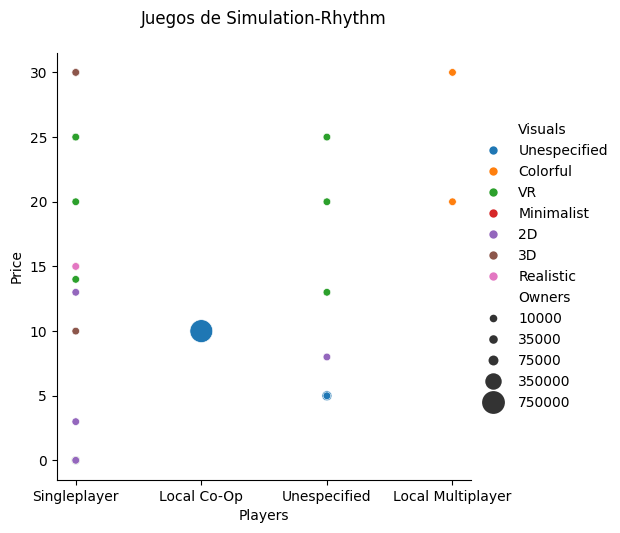

In [17]:
df2 = df.copy()
df2['Subgenres'].fillna('Unespecified',inplace=True)
df2['Visuals'].fillna('Unespecified',inplace=True)
df2['Players'].fillna('Unespecified',inplace=True)

sns.relplot(x = 'Players',
           y = 'Price',
           size = 'Owners',
           hue = 'Visuals',
           sizes = (30,270),
           data = df2[(df2['Top level genre']=='Simulation') & (df2['Genres']=='Rhythm')]).set(title='Juegos de Simulation-Rhythm\n')
plt.xticks(rotation=0);

print(f'Hay {len(df2[(df2["Top level genre"]=="Simulation") & (df2["Genres"]=="Rhythm")])} juegos de tipo Simulation-Rhythm')

¿Cuál es el más vendido?

In [18]:
top_simulation_rhythm = df[(df['Top level genre']=='Simulation') & (df['Genres']=='Rhythm')].sort_values(by='Owners', ascending=False)[['Game','Owners']]
print(f"El juego más vendido es '{top_simulation_rhythm.iloc[0,0]}' con {top_simulation_rhythm.iloc[0,1]} copias vendidas")

El juego más vendido es 'Rocksmith 2014 Edition - Remastered' con 750000 copias vendidas


## 5.4 Juegos de Annapurna Interactive

Hay 25 juegos editados por Annapurna Interactive
0 juegos son de tipo Simulation
1 juegos son de tipo Rhythm
2 juegos son de tipo 2D
23 juegos son de tipo Singleplayer
El rango de sus precios es de 5.99$ a 39.99$ y su media es de 19.39$
La media de sus ventas es de 392800.0 copias por juego publicado


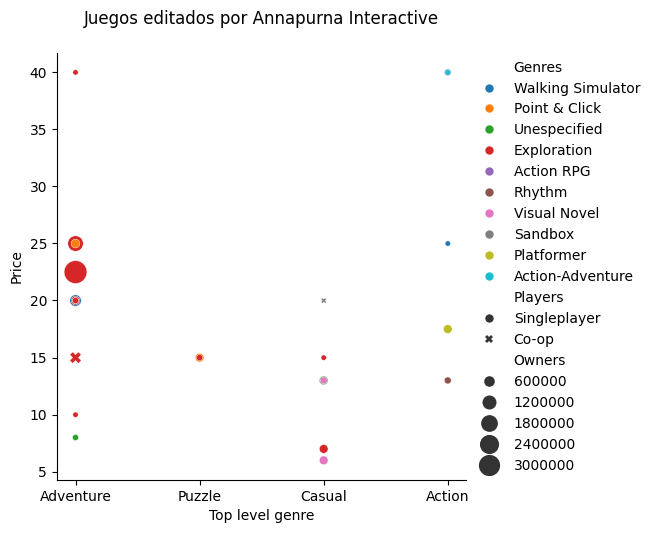

In [19]:
df2 = df.copy()
df2['Genres'].fillna('Unespecified', inplace=True)
df2['Subgenres'].fillna('Unespecified', inplace=True)
df2['Visuals'].fillna('Unespecified', inplace=True)
df2['Players'].fillna('Unespecified', inplace=True)

sns.relplot(x = 'Top level genre',
           y = 'Price',
           size = 'Owners',
           hue = 'Genres',
           style = 'Players',
           sizes = (15,270),
           data = df2[df2['Publisher(s)']=='Annapurna Interactive']).set(title='Juegos editados por Annapurna Interactive\n')
plt.xticks(rotation=0);

print(f"Hay {len(df2[df2['Publisher(s)']=='Annapurna Interactive'])} juegos editados por Annapurna Interactive")
print(f"{len(df2[(df2['Publisher(s)']=='Annapurna Interactive') & (df2['Top level genre']=='Simulation')])} juegos son de tipo Simulation")
print(f"{len(df2[(df2['Publisher(s)']=='Annapurna Interactive') & (df2['Genres']=='Rhythm')])} juegos son de tipo Rhythm")
print(f"{len(df2[(df2['Publisher(s)']=='Annapurna Interactive') & (df2['Visuals']=='2D')])} juegos son de tipo 2D")
print(f"{len(df2[(df2['Publisher(s)']=='Annapurna Interactive') & (df2['Players']=='Singleplayer')])} juegos son de tipo Singleplayer")
print(f"El rango de sus precios es de {df2[df2['Publisher(s)']=='Annapurna Interactive']['Price'].min()}$ a {df2[df2['Publisher(s)']=='Annapurna Interactive']['Price'].max()}$ y su media es de {df2[df2['Publisher(s)']=='Annapurna Interactive']['Price'].mean()}$")
print(f"La media de sus ventas es de {df2[df2['Publisher(s)']=='Annapurna Interactive']['Owners'].mean()} copias por juego publicado")

De los 25 juegos publicados por Annapurna Interactive sólo 1 es de tipo *Rhythm* y ninguno es de tipo *Simulation*. Eso implica que este editor tendría que arriesgarse a invenrtir en un tipo de producto que no suele lanzar al mercado, y por tanto puede ser más difícil obtener su financiación.

## Conclusiones

Después de analizar cada característica del juego en relación a la plataforma Steam, llegamos a las siguientes conclusiones:
- **Éxito del producto**:
    - Después de analizar los **Géneros principales**:
        - Oferta: *Simulation* no se encuentra entre los más ofertados, así que no tendrá tantas dificultades en su competencia.
        - Demanda: *Simulation* tampoco se encuentra entre los más vendidos, así que tendrá una audiencia menor y por tanto una perspectiva de ventas más reducida.
    - Después de analizar los **Géneros secundarios**:
        - Oferta: *Rhythm* no se encuentra entre los más ofertados (es el número 25), así que no tendrá tantas dificultades en su competencia.
        - Demanda: *Simulation* tampoco se encuentra entre los más vendidos (también el número 25), así que tendrá una audiencia menor y por tanto una perspectiva de ventas más reducida.
    - Después de analizar el **Género principal** y el **Género secundario** en conjunto:
        - Oferta: sólo hay 30 juegos publicados de este tipo, así que podríamos argumentar que un punto fuerte de *The Midgnight Barber* es la innovación.
        - Demanda: el juego de este tipo más vendido es *'Rocksmith 2014 Edition - Remastered'* con 750000 copias vendidas. Convendría fijarse en él para analizar cuáles fueron sus puntos fuertes y tomar inspiración de ellos.
- Posibilidades de **financiación con Annapurna Interactive**:
    - Por **Géneros**: de los 25 juegos publicados por este editor, la mayoría son de tipo *Exploration*, sólo 1 es de tipo *Rhythm* y ninguno de tipo *Simulation*. Esto podría ser un inconveniente. Por otro lado, el número de Géneros Secundarios distintos que ha publicado este editor es de al menos 10. Esto indica que no tienen un catálogo de Géneros Secundarios muy homogéneo, así que podría ser un punto a favor para *The Midnight Barber*.
    - Por **Visuales**: sólo 2 de los 25 juegos son tipo *2D*, el resto son *3D*. De nuevo, dependiendo de si buscan seguir una línea homogénea en su catálogo, esto podría dificultar la obtención de financiación.
    - Por **Jugadores**: la mayor parte de sus juegos son tipo *Singleplayer*, así que en ese sentido el producto podría encajar bien en su catálogo.
- Referencias de **ventas de Annapurna Interactive**:
    - **Precio**: el precio al que sacan al mercado sus productos oscila entre los 5$ y los 40$, pero principalmente entre los 10$ y los 25$. Este rango encaja muy bien con la estimación de precio del producto: de acuerdo a los costes de producción, se desearía sacar el juego al mercado con un precio de unos 20$.
    - **Ventas**: la media de ventas de Annapurna Interactive es de 392800 copias por juego publicado. Esta cifra va más allá de las pretensiones de este producto, así que podría ser extremadamente beneficioso la financiación de este editor.
- **Mes** de publicación: menos octubre, ningún mes parece destacar por tener más o menos publicaciones. En este sentido, el mes de publicación parece ser irrelevante.
- **Día** de publicación: excepto el 1 de cada mes, ningún día parece destacar por tener más o menos publicaciones. En este sentido, el día de publicación parece ser irrelevante.

<hr>

<div style="display: flex; justify-content: space-between; margin-bottom: 10px;">
    <div style="text-align: left;">
        <a href="./4_plotting_data.ipynb">
            <button>&#8592; 4. Plotting data </button>
        </a>
    </div>
</div>

<hr>